<a href="https://colab.research.google.com/github/JimHM21/Biohuerto/blob/main/Visualizaci%C3%B3n_de_la_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # álgebra lineal
import pandas as pd # procesamiento de datos, E/S de archivos CSV (p. ej. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Lecturas de sensores/feeds (8).csv'):# el archivo .csv es nuestra data
    # Bloque sangrado para el bucle for externo
    for filename in filenames:
        # Bloque sangrado para el bucle for interno
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lecturas de sensores/feeds (8).csv')#lectura de la data

In [ ]:
# Excluir 'entry_id','latitude','longitude','elevation','status' para la visualización ;y valor que se utiliza para los modelos y tablas
datasin = df.drop(columns=['entry_id','latitude','longitude','elevation','status'])


In [ ]:
#Vista de Datos
datasin.head()

,created_at,temperatura_ambiente,humedad_ambiente,temperatura_suelo,humedad_suelo
0,2024-10-23T03:00:13+00:00,23.4,64,20.75,100
1,2024-10-23T03:00:29+00:00,23.4,64,20.81,0
2,2024-10-23T03:00:46+00:00,23.4,64,20.75,33
3,2024-10-23T03:01:02+00:00,23.4,64,20.75,38
4,2024-10-23T03:01:20+00:00,23.4,64,20.75,41


In [ ]:
datasin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            1680 non-null   object 
 1   temperatura_ambiente  1680 non-null   float64
 2   humedad_ambiente      1680 non-null   int64  
 3   temperatura_suelo     1680 non-null   float64
 4   humedad_suelo         1680 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 65.8+ KB


In [ ]:
datasin.describe()

,temperatura_ambiente,humedad_ambiente,temperatura_suelo,humedad_suelo
count,1680.000000,1680.000000,1680.000000,1680.000000
mean,24.648095,63.179167,19.720440,43.946429
std,2.260497,8.225929,1.066075,27.897190
min,21.400000,46.000000,17.190000,0.000000
25%,23.400000,56.000000,19.120000,19.750000
50%,24.100000,63.000000,19.810000,45.000000
75%,25.300000,69.000000,20.310000,60.000000
max,30.200000,95.000000,24.690000,100.000000


In [ ]:
#Vizualizacion en cuadros
#Se agrupan en columnas numéricas y columnas de categorias para utilizarce en la representación de los graficos de los datos.
num_cols = datasin.select_dtypes(include = ['int64','float64']).columns
cat_cols = datasin.select_dtypes(include = ['object']).columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Para ignorar las advertencias
import warnings
warnings.filterwarnings('ignore')

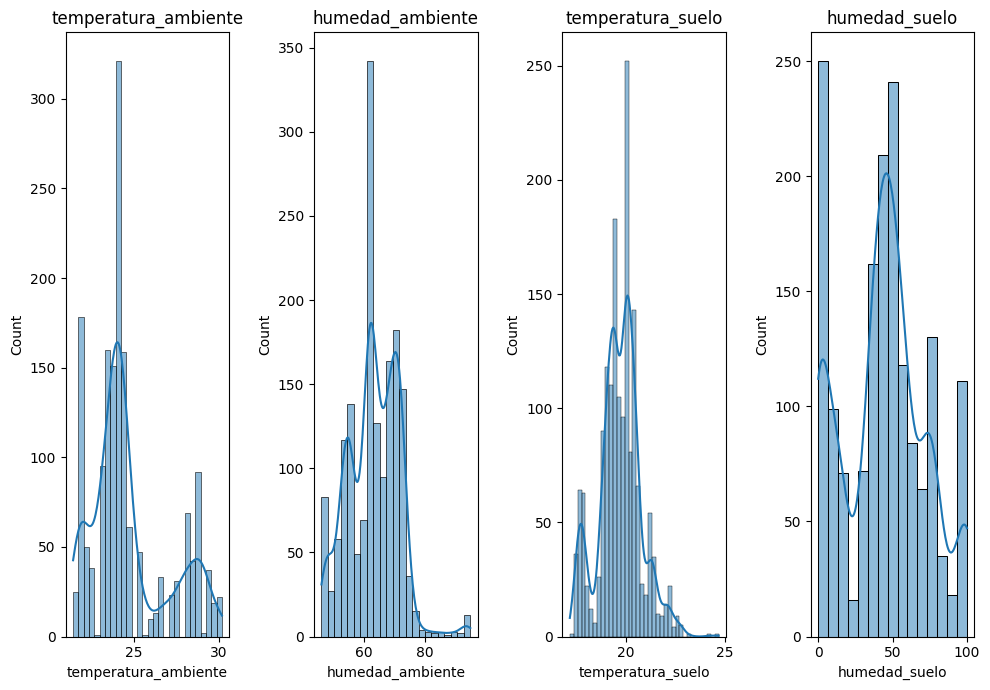

In [ ]:
# Calcular el número de filas y columnas necesarias para las subparcelas
num_rows = (len(num_cols) + 3) // 4  # Calcular el número de filas necesarias
num_cols_plot = min(len(num_cols), 4)  # Utiliza 4 columnas como máximo

f, ax = plt.subplots(num_rows, num_cols_plot, figsize=(10, 7 * num_rows))
ax = ax.flatten()

# Iterar a través de las columnas numéricas y crear subparcelas
for index, cols in enumerate(num_cols):
    sns.histplot(data=df, x=cols, ax=ax[index], kde=True)
    ax[index].set_title(cols)


plt.tight_layout()
plt.show()

<Axes: >

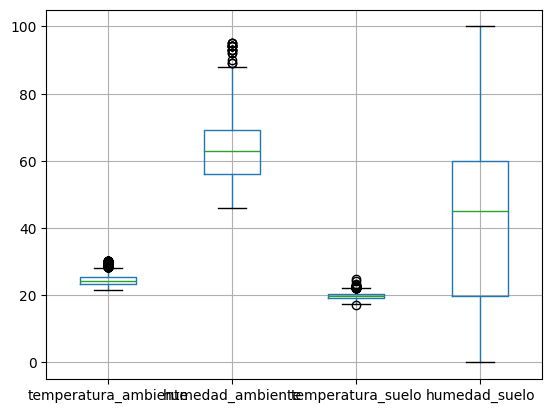

In [ ]:
datasin.boxplot()

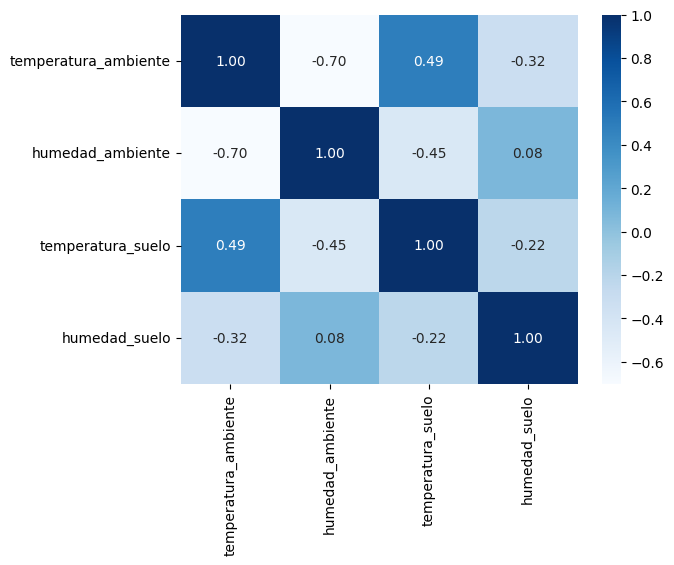

In [ ]:
sns.heatmap(datasin[num_cols].corr(),annot=True, cmap='Blues',fmt= '.2f')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     # Para Regresion Lineal
from sklearn.preprocessing import StandardScaler     # Para escalar los datos
from sklearn.ensemble import RandomForestRegressor    # Para Random Forest
from sklearn.svm import SVR                           # Para Support Vector Regression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Para evaluar los modelos

In [ ]:
# Convertir created_at en el índice o excluirlo, si no es relevante
datasin = datasin.drop(columns=['created_at'])

In [ ]:
# Crear una columna 'volumen_agua' simulada en base a la humedad del suelo
# Supongamos que la cantidad de agua varía entre 200 ml (cuando la humedad es alta) y 1000 ml (cuando la humedad es baja)

# Normalizar el rango de humedad del suelo para generar valores dentro del rango de 200 a 1000 ml
min_humedad = datasin['humedad_suelo'].min()
max_humedad = datasin['humedad_suelo'].max()

In [ ]:
datasin['volumen_agua'] = 1000 - ((datasin['humedad_suelo'] - min_humedad) / (max_humedad - min_humedad)) * 800
# Ahora 'volumen_agua' es una columna simulada que representa el volumen estimado de agua necesario

In [ ]:
# Separar las variables predictoras y la variable objetivo
X = datasin[['temperatura_ambiente', 'humedad_ambiente', 'temperatura_suelo', 'humedad_suelo']]
y = datasin['volumen_agua']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()
# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 9.578123722363463e-27
MAE: 6.361049253471373e-14
R-squared: 1.0


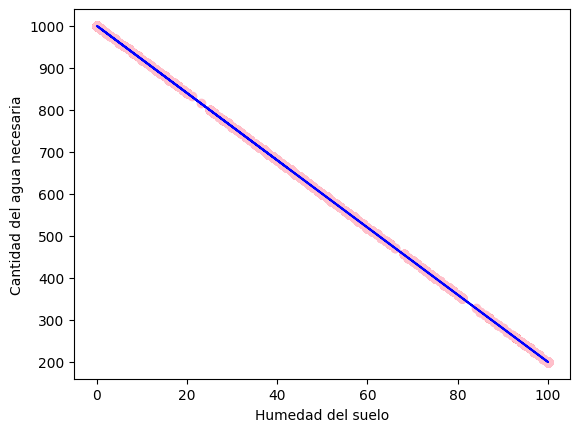

In [ ]:
plt.scatter(X_test['humedad_suelo'], y_pred,color='red')
plt.plot(X_test['humedad_suelo'], y_pred,color='blue')
plt.ylabel('Cantidad del agua necesaria')
plt.xlabel('Humedad del suelo')
plt.scatter(datasin['humedad_suelo'],datasin['volumen_agua'],color="pink")
plt.show()


In [ ]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)

Random Forest Regressor
Mean Squared Error: 0.9837142857142861
Mean Absolute Error: 0.19833333333333253
R-squared: 0.9999808902886091


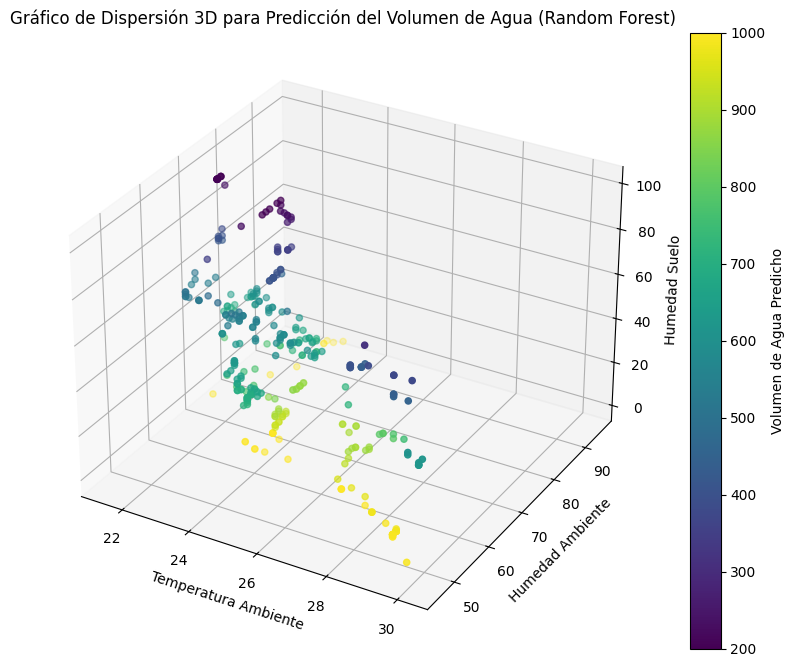

In [ ]:
# Creamos el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Usa tres características para el gráfico de dispersión 3D
x = X_test['temperatura_ambiente']
y = X_test['humedad_ambiente']
z = X_test['humedad_suelo']
c = y_pred_rf  # Valores predichos del volumen de agua

# Scatter plot 3D
sc = ax.scatter(x, y, z, c=c, cmap='viridis', marker='o')
ax.set_xlabel('Temperatura Ambiente')
ax.set_ylabel('Humedad Ambiente')
ax.set_zlabel('Humedad Suelo')
plt.colorbar(sc, label='Volumen de Agua Predicho')
plt.title('Gráfico de Dispersión 3D para Predicción del Volumen de Agua (Random Forest)')
plt.show()

In [ ]:
# Modelo Support Vector Regression (SVR)
# Escalar las características
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [ ]:
# Dividir en conjunto de entrenamiento y prueba para SVR
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_svr, y_train_svr)

SVR()

In [ ]:
# Realizar predicciones y desescalar para obtener los valores reales
y_pred_svr_scaled = svr_model.predict(X_test_svr)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()
y_test_svr = scaler_y.inverse_transform(y_test_svr.reshape(-1, 1)).flatten()

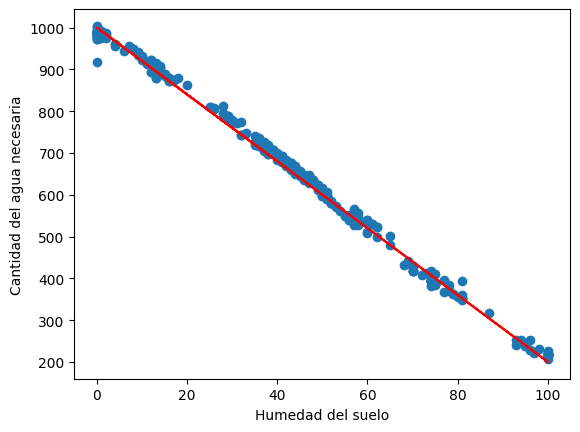

In [ ]:
plt.scatter(X_test['humedad_suelo'], y_pred_svr)
plt.plot(X_test['humedad_suelo'], y_pred,color='red')
plt.ylabel('Cantidad del agua necesaria')
plt.xlabel('Humedad del suelo')
plt.show()

In [ ]:
# Evaluación del modelo
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
r2_svr = r2_score(y_test_svr, y_pred_svr)

print("Support Vector Regressor")
print("Mean Squared Error:", mse_svr)
print("Mean Absolute Error:", mae_svr)
print("R-squared:", r2_svr)

Support Vector Regressor
Mean Squared Error: 23878960451.896984
Mean Absolute Error: 146079.49792761775
R-squared: -8.318762513221017


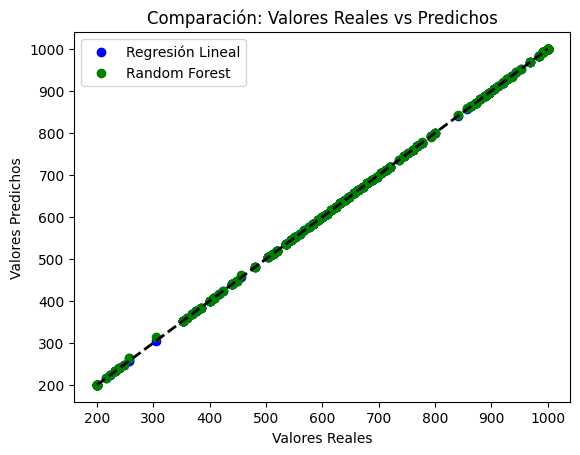

In [ ]:
#Grafico de "Predicción vs Valores Reales"
# Para Regresión Lineal
plt.scatter(y_test, y_pred, label="Regresión Lineal", color='blue')

# Para Random Forest
plt.scatter(y_test, y_pred_rf, label="Random Forest", color='green')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación: Valores Reales vs Predichos")
plt.legend()
plt.show()

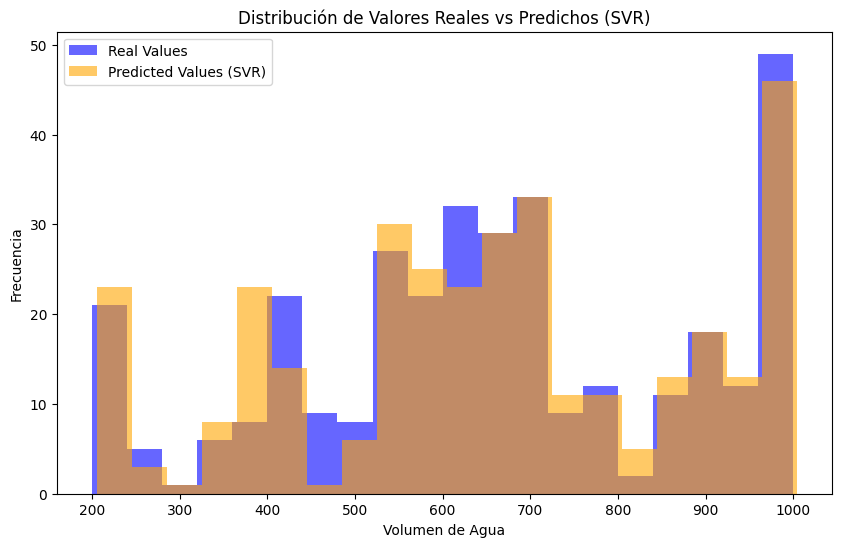

In [ ]:
# Graficar histogramas de los valores reales y predichos
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.6, color='blue', label='Real Values')
plt.hist(y_pred_svr, bins=20, alpha=0.6, color='orange', label='Predicted Values (SVR)')
plt.xlabel('Volumen de Agua')
plt.ylabel('Frecuencia')
plt.title('Distribución de Valores Reales vs Predichos (SVR)')
plt.legend()
plt.show()